# Importing the libraries

For datasets like this one, go to kaggle.com. The analysis has been performed by elisabeth-sh.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly

# Downloading the data

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df_city = df[df["hotel"] == "City Hotel"]
df_city.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-04-02
40065,City Hotel,1,79,2015,July,27,2,0,3,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-06-25
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,NaN,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40067,City Hotel,1,63,2015,July,27,2,1,3,1,...,No Deposit,9.0,NaN,0,Transient,68.00,0,0,Canceled,2015-06-25
40068,City Hotel,1,62,2015,July,27,2,2,3,2,...,No Deposit,8.0,NaN,0,Transient,76.50,0,1,No-Show,2015-07-02
40069,City Hotel,1,62,2015,July,27,2,2,3,2,...,No Deposit,8.0,NaN,0,Transient,76.50,0,1,No-Show,2015-07-02


# EDA

In [3]:
df_city.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              24
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8131
company                           75641


In [4]:
df_city = df_city.drop(columns = ["company", "agent"])

In [5]:
df_city.dropna(axis = 0, inplace = True)

In [6]:
df_city.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Data Analysis

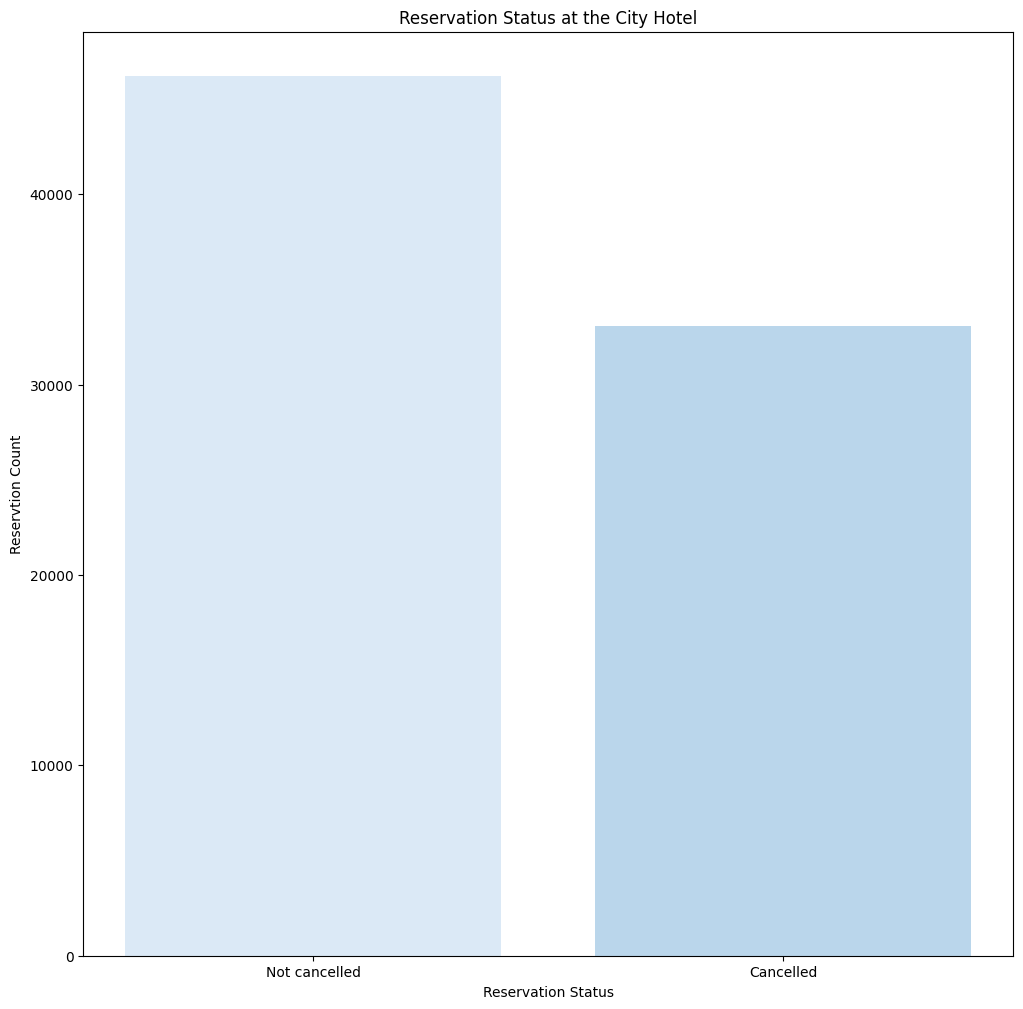

In [7]:
fig = plt.figure(figsize = (12, 12))
plt.bar(["Not cancelled", "Cancelled"], df_city["is_canceled"].value_counts(), color = sns.color_palette("Blues"))
plt.xlabel("Reservation Status")
plt.ylabel("Reservtion Count")
plt.title("Reservation Status at the City Hotel")
plt.show()

According to the chart above about 41% of reservations at the City Hotel are cancelled. Therefore, there is a churn problem at the enterprise.

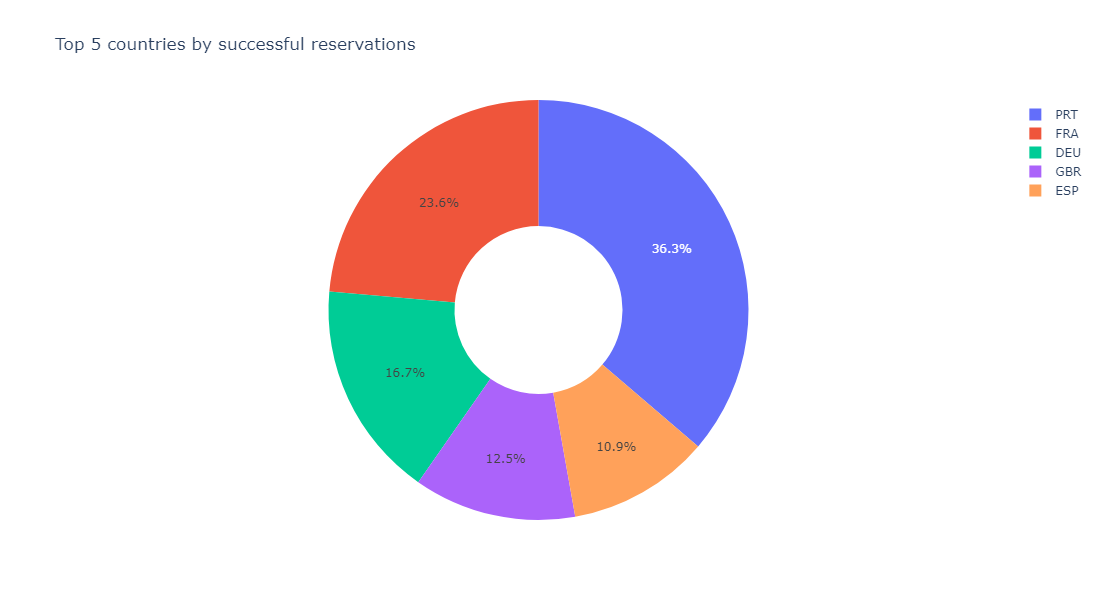

In [27]:
import plotly.graph_objects as go
city_success = df_city[df_city["is_canceled"] == 0]
labels = city_success["country"].value_counts()[:5].index.tolist()
values = city_success["country"].value_counts()[:5].tolist()

fig = go.Figure(data=[go.Pie(labels = labels, values = values, hole=.4)], 
                layout=go.Layout(width=800, height=600, title = "Top 5 countries by successful reservations"))
fig.show()

Most successful reservations come from Portugal (36.3%). The French segment comes second (23.6%). Germany takes third place (16.7%). Then comes Great Britain (12.5%). Spain is the fifth country with the highest number of successful reservations (10.9%).

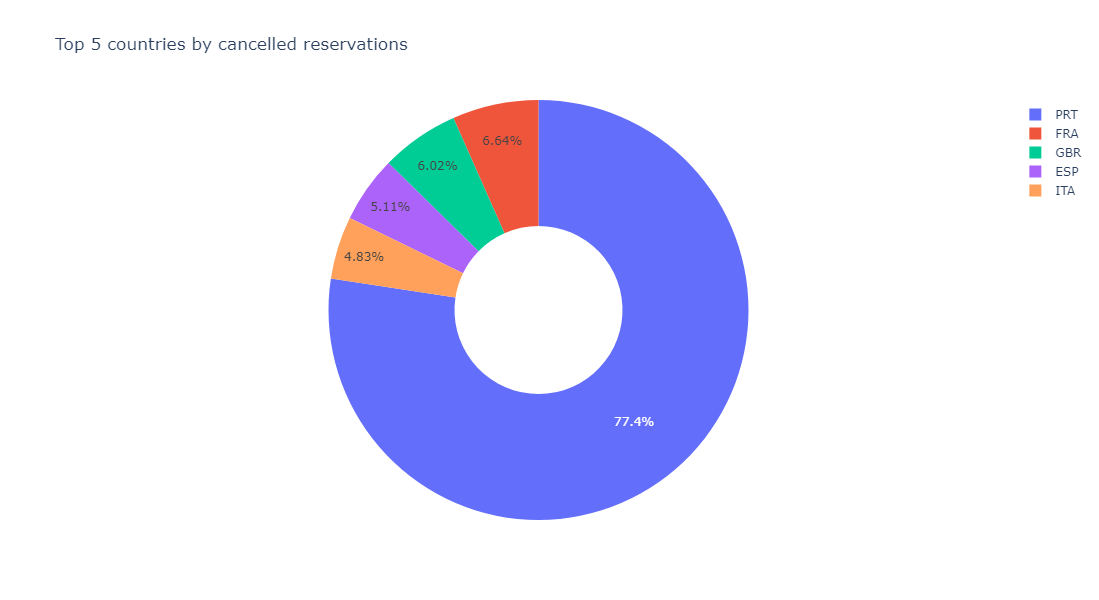

In [29]:
city_cancelled = df_city[df_city["is_canceled"] == 1]
labels = city_cancelled["country"].value_counts()[:5].index.tolist()
values = city_cancelled["country"].value_counts()[:5].tolist()

fig = go.Figure(data=[go.Pie(labels = labels, values = values, hole=.4)], 
                layout=go.Layout(width=800, height=600, title = "Top 5 countries by cancelled reservations"))
fig.show()

Surprisingly, the overwhelming majority of cancelled reservations (77.4%) come from Portugal. Other countries with a relatively high number of cancellations are France (6.64%), Great Britain (6.02%), Spain (5.11%) and Italy (4.83%).

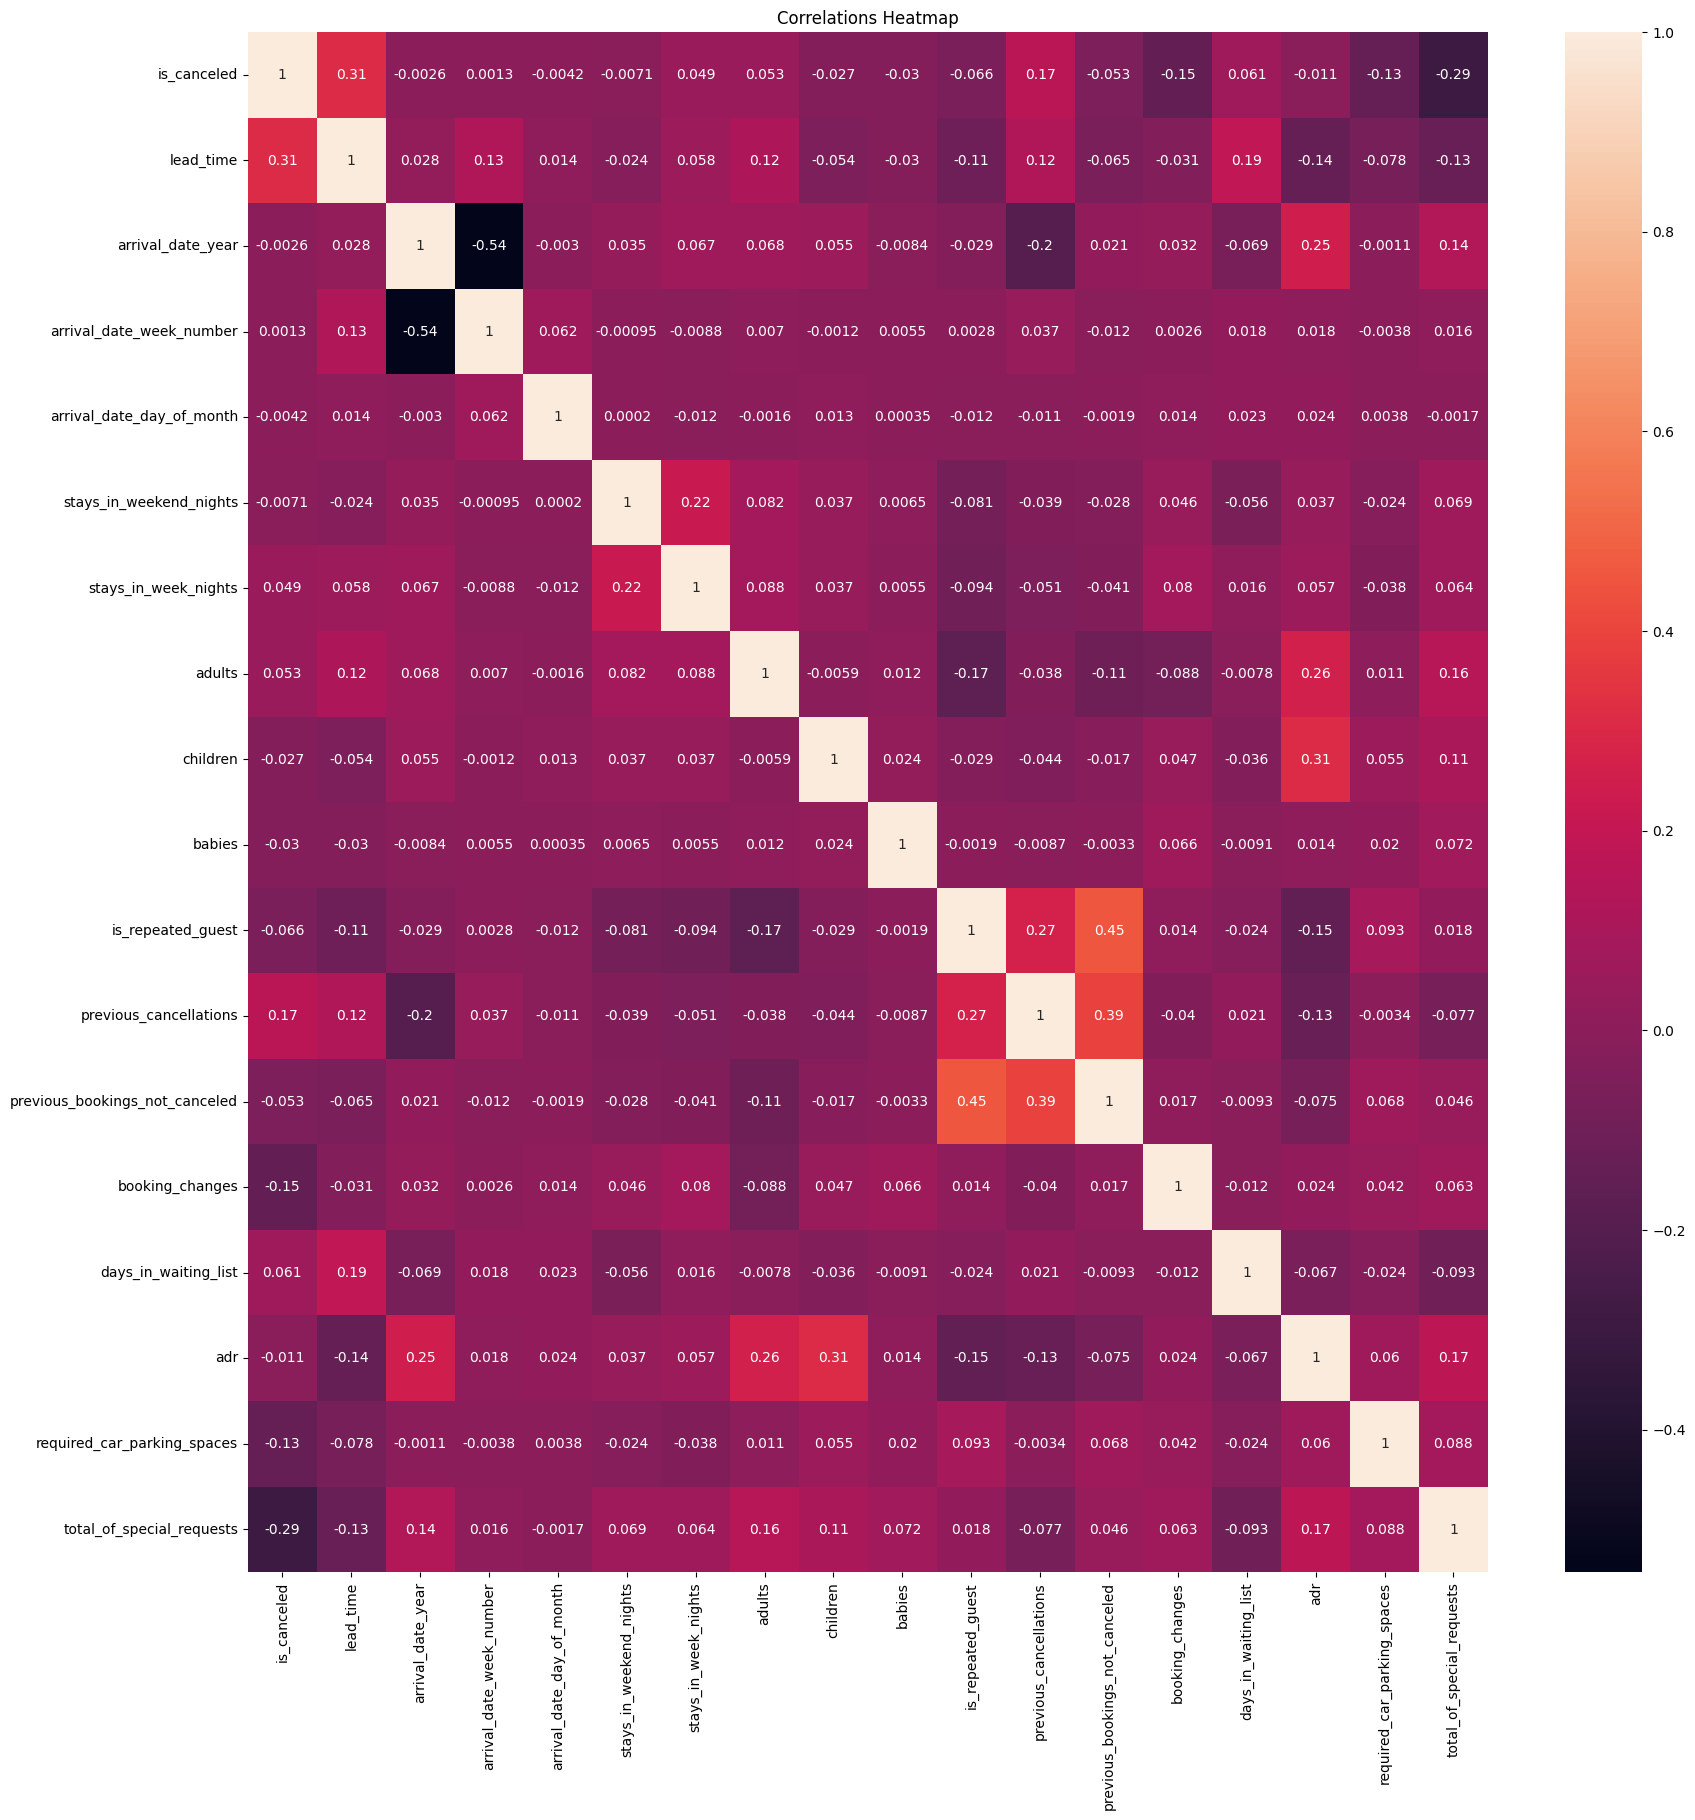

In [11]:
plt.figure(figsize = (20, 20))
co = df_city.select_dtypes("number").corr()
sns.heatmap(co, annot = True)
plt.title("Correlations Heatmap")
plt.show()

The heatmap above indicates that there may be a correlation between lead time (the interval between booking a room and checking in) and cancellation status. 

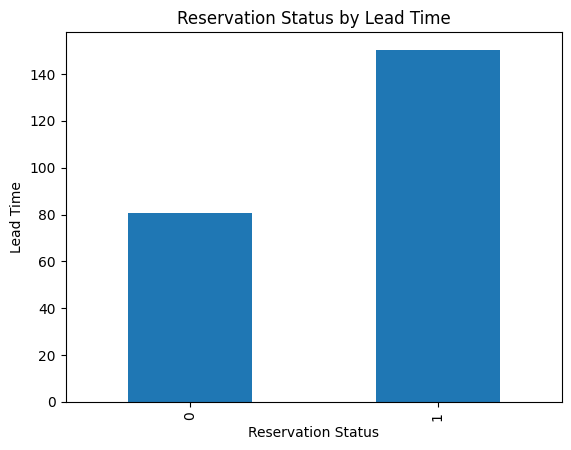

In [45]:
df_city.groupby('is_canceled')['lead_time'].mean().plot(kind = "bar")
plt.title("Reservation Status by Lead Time")
plt.xlabel("Reservation Status")
plt.ylabel("Lead Time")
plt.show()

It can be deduced from the bar chart above that the higher the lead time the more reservations get cancelled.

In [17]:
#peak bookings
df_city["arrival_date_month"].value_counts()

arrival_date_month
August       8979
May          8232
July         8088
June         7894
October      7591
April        7476
September    7400
March        6458
February     4965
November     4354
December     4129
January      3736
Name: count, dtype: int64

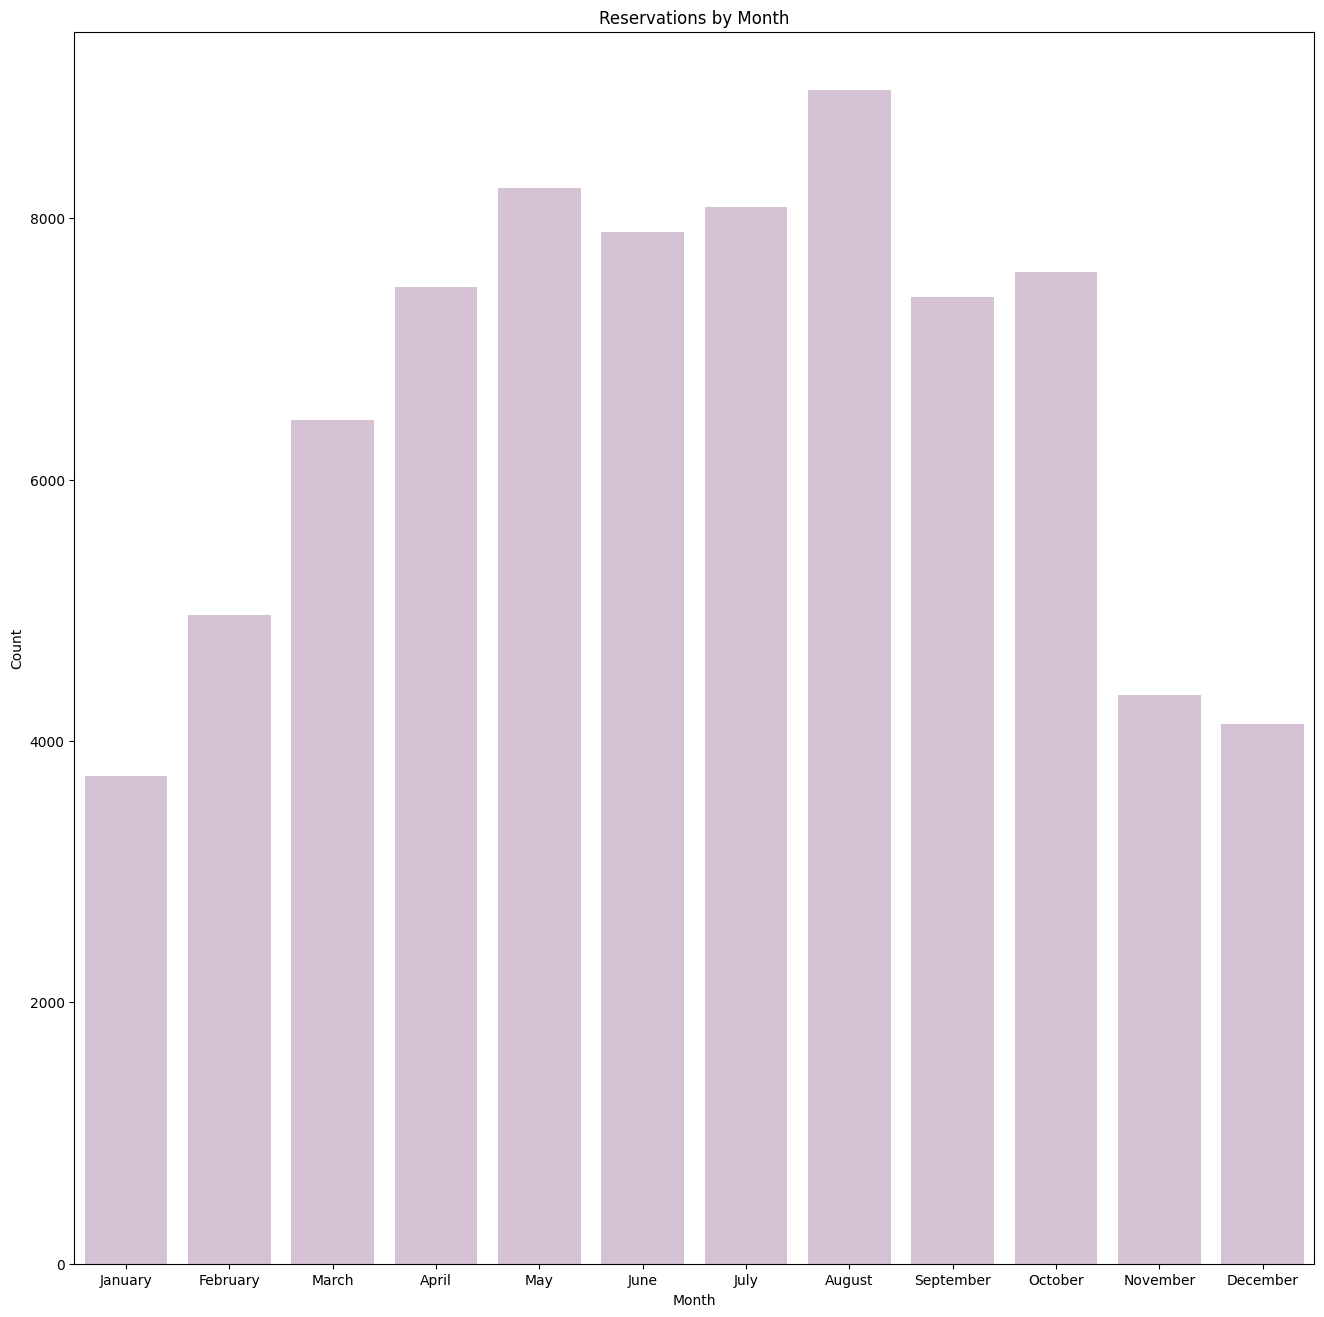

In [16]:
plt.figure(figsize = (16, 16))
sns.countplot(data = df_city, x = "arrival_date_month", order = ["January", "February", "March", "April", "May", "June", "July", "August",
                                                                "September", "October", "November", "December"], color = "thistle")
plt.title("Reservations by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

The months August, May and July show a spike in the number of reservations. However, it is imperative that we inspect whether these reservations are successful or not.

In [14]:
#success
df_city.query("is_canceled == 0")["arrival_date_month"].value_counts()

arrival_date_month
August       5381
July         4782
May          4579
June         4366
October      4337
September    4290
March        4072
April        4015
February     3064
November     2694
December     2392
January      2254
Name: count, dtype: int64

In [15]:
#cancelled
df_city.query("is_canceled == 1")["arrival_date_month"].value_counts()

arrival_date_month
May          3653
August       3598
June         3528
April        3461
July         3306
October      3254
September    3110
March        2386
February     1901
December     1737
November     1660
January      1482
Name: count, dtype: int64

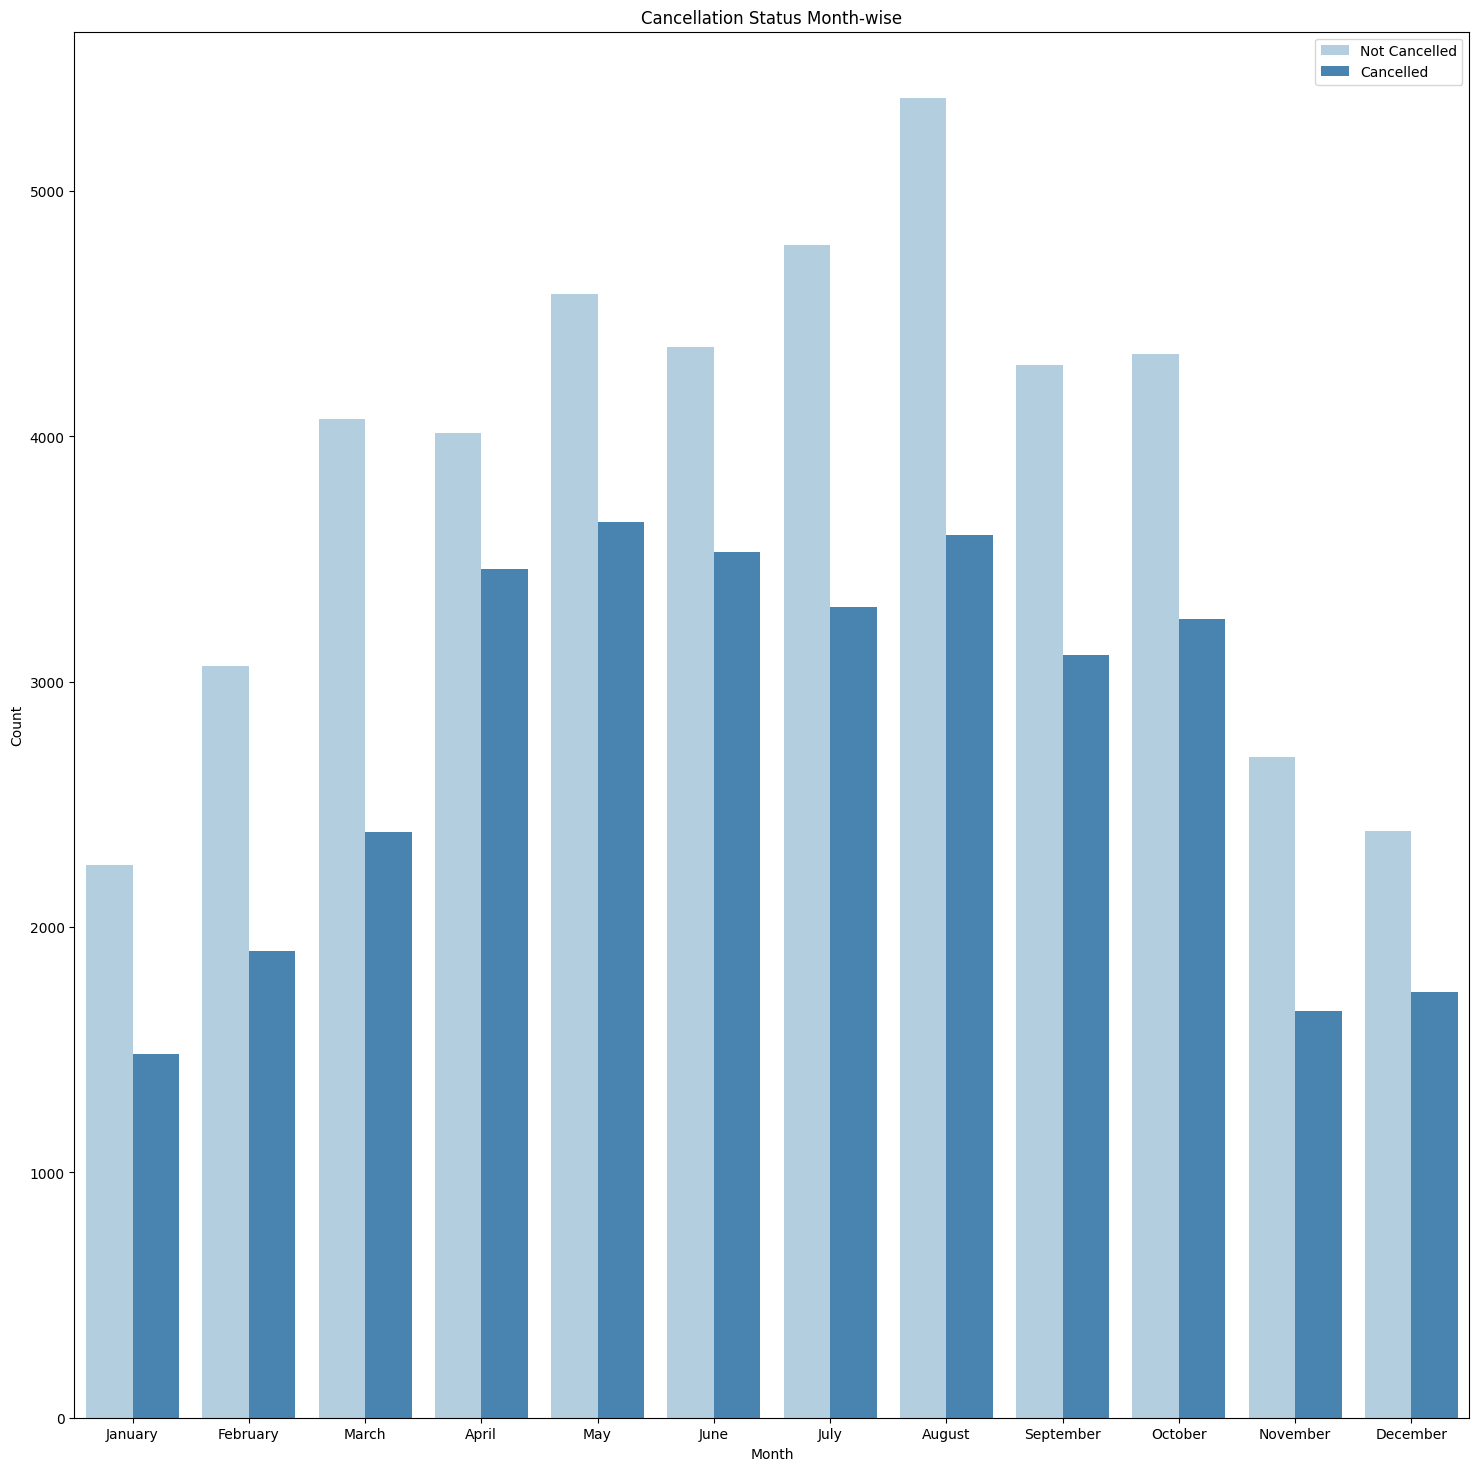

In [13]:
plt.figure(figsize = (18, 18))
sns.countplot(data = df_city, x = "arrival_date_month", hue = "is_canceled", order = ["January", "February", "March", "April", "May", "June", "July", "August",
                                                                "September", "October", "November", "December"], color="blue", palette = "Blues")

plt.title("Cancellation Status Month-wise")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(["Not Cancelled","Cancelled"])
plt.show()

The three months with the highest number of cancelled reservations are May, August and June. That being said, the majority of successful reservations were recorded in August, July and May.

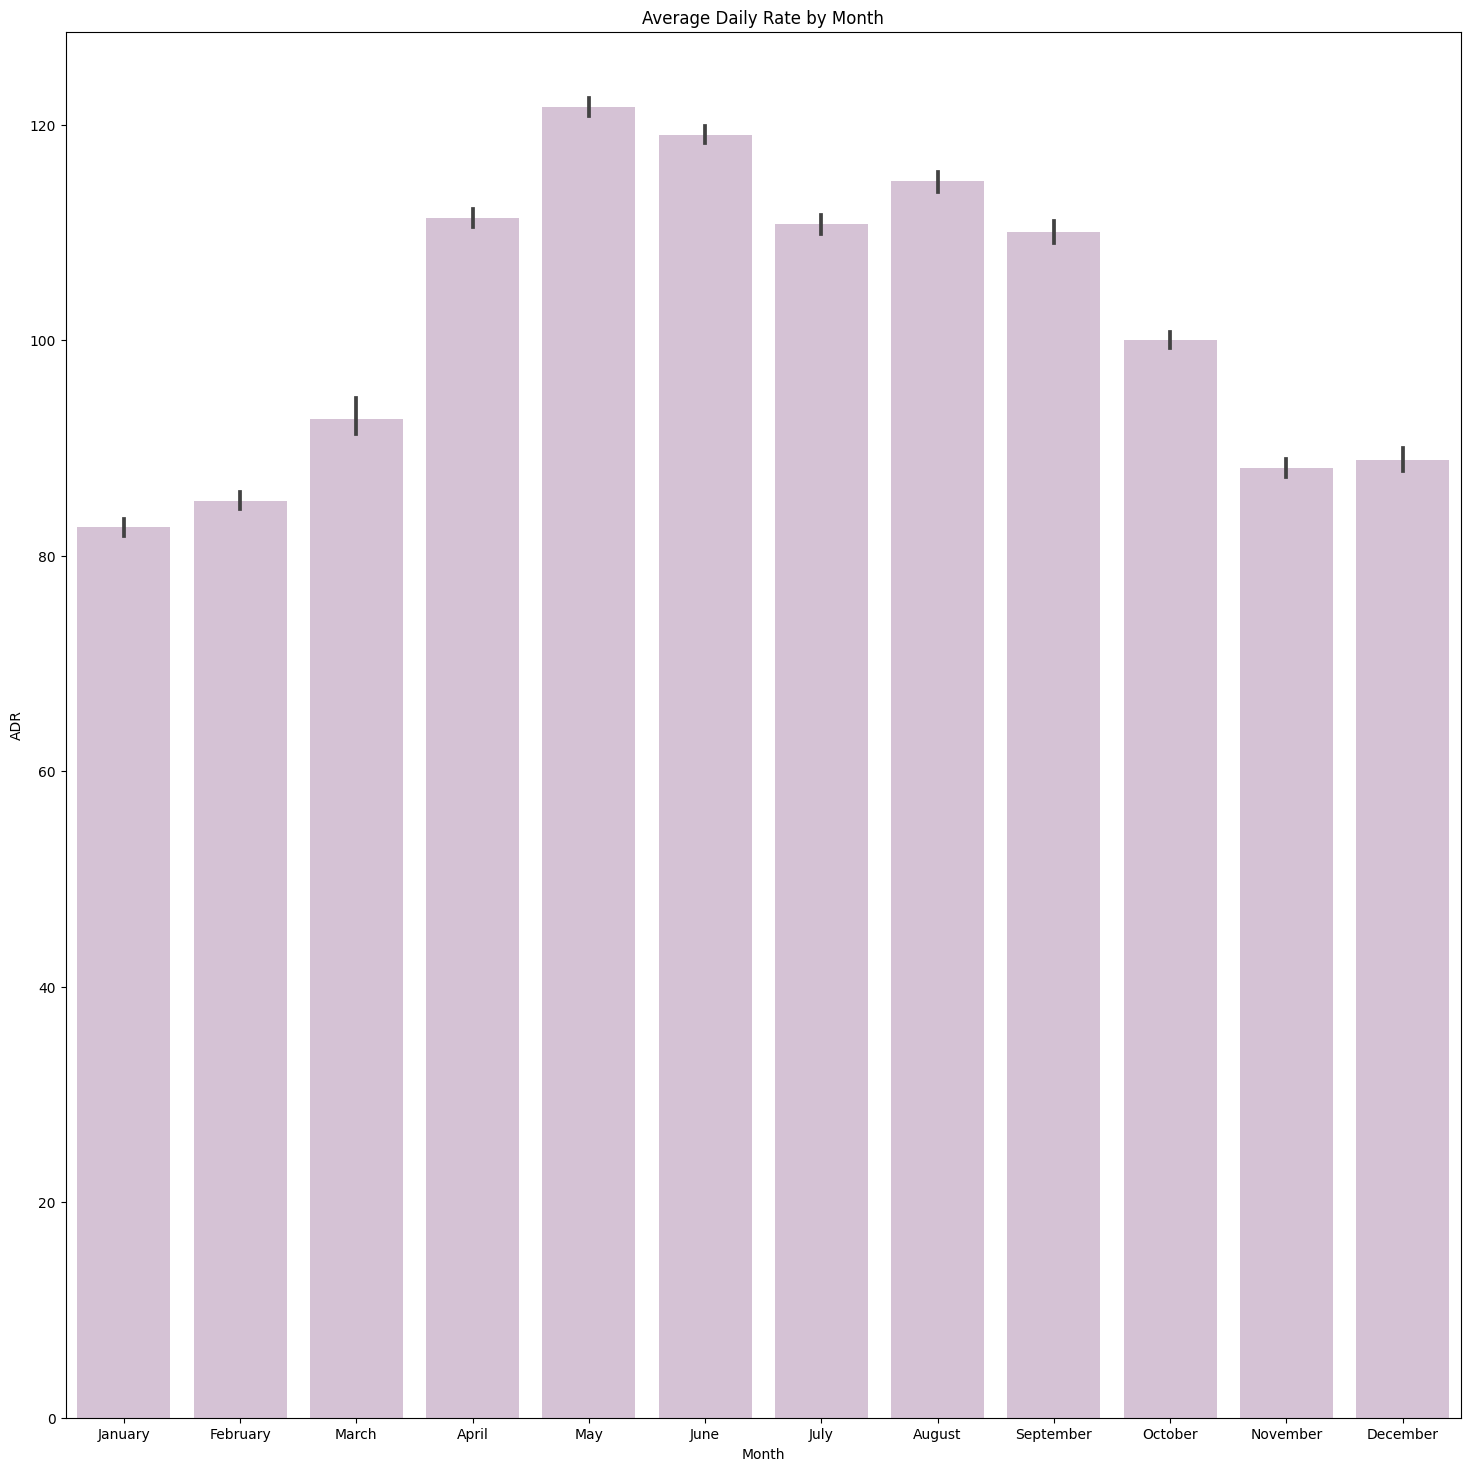

In [18]:
plt.figure(figsize = (18, 18))
sns.barplot(data = df_city, x = "arrival_date_month", y = "adr", order = ["January", "February", "March", "April", "May", "June", "July", "August",
                                                                "September", "October", "November", "December"], color = "thistle")
plt.title("Average Daily Rate by Month")
plt.xlabel("Month")
plt.ylabel("ADR")
plt.show()

ADR is the highest in May, June and August. Such months as November, February and January have the lowest ADR. Thus, the seasonality factor seems to affect both the number of reservations and ADR. Summer months witness more reservations than winter months and ADR tends to rise in summer and falls in winter.

In [19]:
cancelled_adr = city_cancelled.groupby("reservation_status_date")["adr"].mean().reset_index()
cancelled_adr = cancelled_adr.query(("reservation_status_date >= '2015-07' & reservation_status_date <= '2017-10'"))
cancelled_adr.sort_values("reservation_status_date", inplace = True)

success_adr = city_success.groupby("reservation_status_date")["adr"].mean().reset_index()
success_adr = success_adr.query(("reservation_status_date >= '2015-07' & reservation_status_date <= '2017-10'"))
success_adr.sort_values("reservation_status_date", inplace = True)

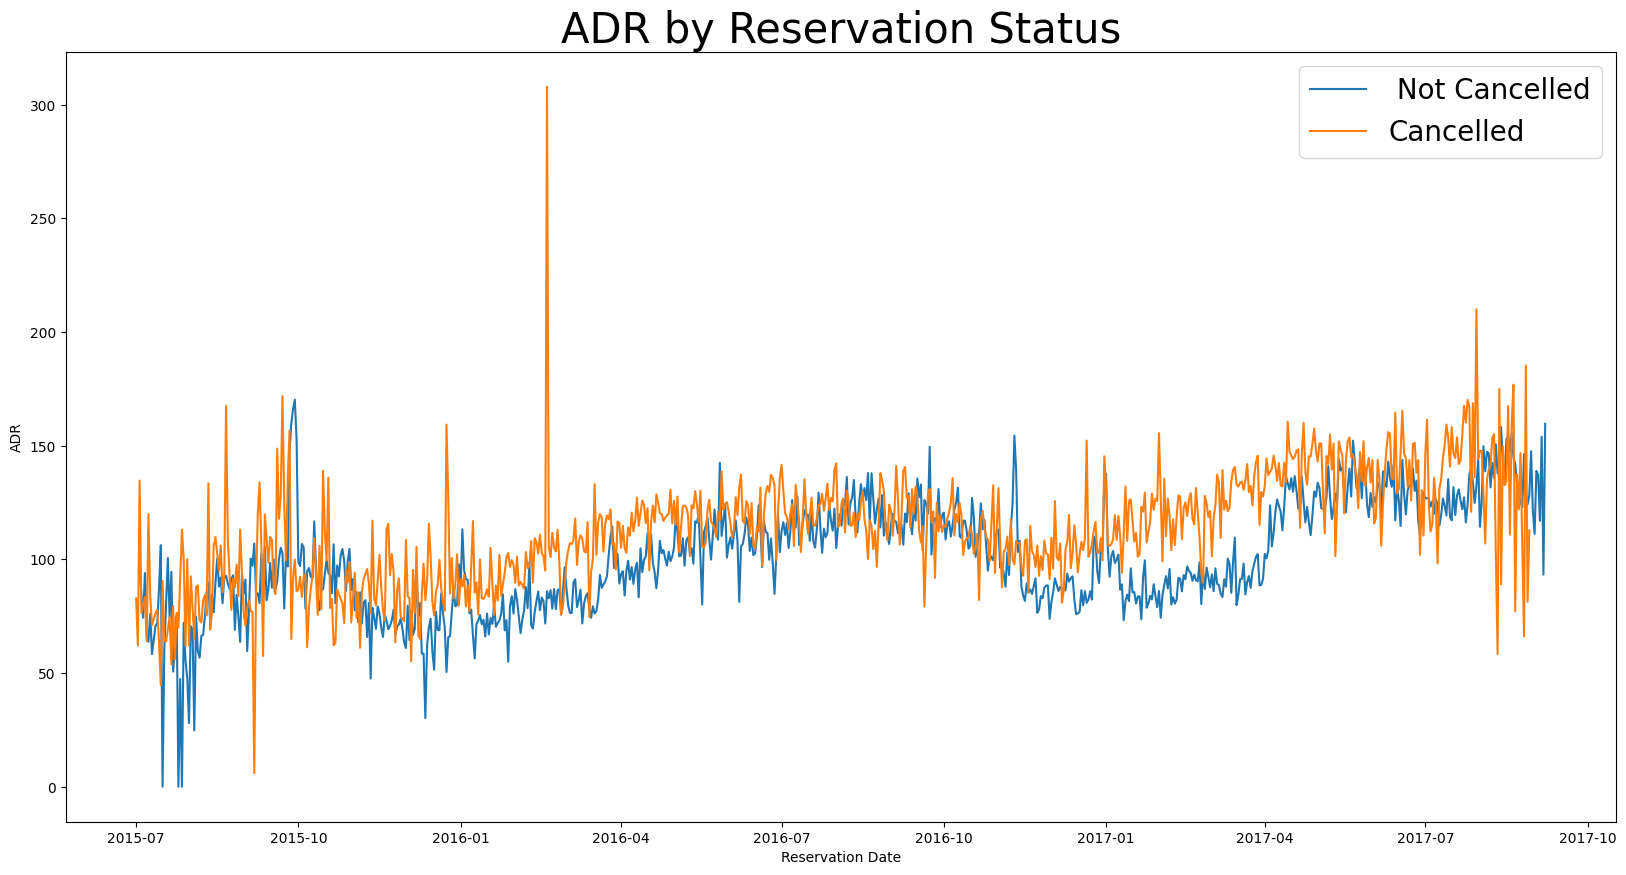

In [20]:
plt.figure(figsize = (20, 10))

plt.plot(success_adr["reservation_status_date"], success_adr["adr"], label = " Not Cancelled")
plt.plot(cancelled_adr["reservation_status_date"], cancelled_adr["adr"], label = 'Cancelled')
plt.ylabel('ADR')
plt.xlabel("Reservation Date")
plt.title('ADR by Reservation Status', fontsize = 30)
plt.legend(fontsize = 20)
plt.show()

The chart above shows the relationship between ADR and reservation status. Although, lower daily rates usually bring more successful reservations, that is not always the case. If ADR is higher than or equals to 120 the cancellation trend becomes unpredictable. Therefore, ADR isn't the decisive factor when it comes to cancellations.

### Recommendations:

1) The City Hotel could offer incentives for early bookings to prevent lead time from affecting reservation status.
2) A cancellation policy could extenuate the problem. For instance, cancellations made within a certain time frame could result in a fee.
3) The hotel could benefit from an online marketing campaign. For instance, to reduce the number of cancellations in Portugal, Portuguese customers could be shown more guest testimonials on social media. 
4) To reduce the impact of seasonality on sales the City Hotel could offer discounts during winter months.
5) Another suggestion is improving customer service. It could be critical when ADR exceeds 120$ as there is a 50% chance of cancellation after that mark.